In [2]:
%matplotlib inline
from datetime import datetime 
import pandas as pd 
from datetime import datetime 
from pathlib import Path 
DATA_PATH = Path('D:\Download\Visualisasi Informasi\Self Learning\Interactive-Data-Visualization-with-Python\datasets\chap5_data\1962_2006_walmart_store_openings.csv')

In [8]:
walmart_stores = pd.read_csv(r'D:\Download\Visualisasi Informasi\Self Learning\Interactive-Data-Visualization-with-Python\datasets\chap5_data\1962_2006_walmart_store_openings.csv', parse_dates=['date_super']).dropna()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23752\2034466922.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  walmart_stores = pd.read_csv(r'D:\Download\Visualisasi Informasi\Self Learning\Interactive-Data-Visualization-with-Python\datasets\chap5_data\1962_2006_walmart_store_openings.csv', parse_dates=['date_super']).dropna()


In [9]:
walmart_store_count = walmart_stores.groupby("YEAR")[["storenum"]].agg("count").rename(columns={"storenum": "store_count"})

In [10]:
walmart_store_count = pd.merge(walmart_stores, walmart_store_count, on="YEAR")

In [11]:
walmart_store_count= walmart_store_count.set_index(pd.DatetimeIndex(walmart_store_count.date_super))

In [12]:
walmart_store_count = walmart_store_count[["date_super", "store_count"]] 
walmart_store_count.drop_duplicates(subset="date_super", inplace=True)

In [13]:
walmart_store_count.head(8)

,date_super,store_count
date_super,,
1997-03-01,1997-03-01,1
1996-03-01,1996-03-01,1
2002-03-01,2002-03-01,1
1993-03-01,1993-03-01,1
1998-03-01,1998-03-01,5
1994-03-01,1994-03-01,5
2002-02-20,2002-02-20,5
2000-03-01,2000-03-01,5


In [14]:
walmart_store_count_series = walmart_store_count.store_count
walmart_store_count_series = walmart_store_count_series.asfreq('2D')
walmart_store_count_series.head()

date_super
1988-03-01    14.0
1988-03-03     NaN
1988-03-05     NaN
1988-03-07     NaN
1988-03-09     NaN
Freq: 2D, Name: store_count, dtype: float64

<Axes: xlabel='date_super'>

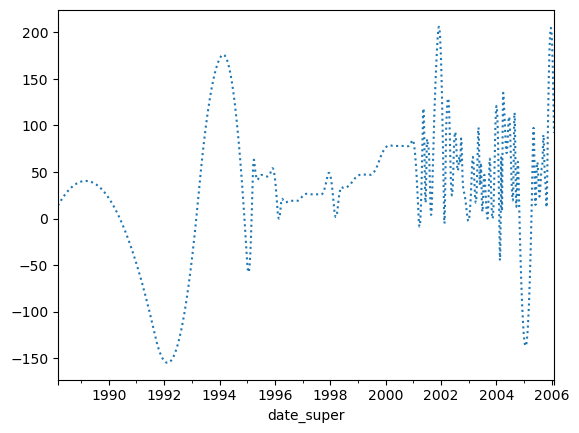

In [15]:
walmart_store_count_series = walmart_store_count_series.interpolate(method="spline", order=2)
walmart_store_count_series.plot(style=":")

<Axes: title={'center': 'Values Smoothen by Business Year Frequency'}, xlabel='date_super', ylabel='Interpolated Values'>

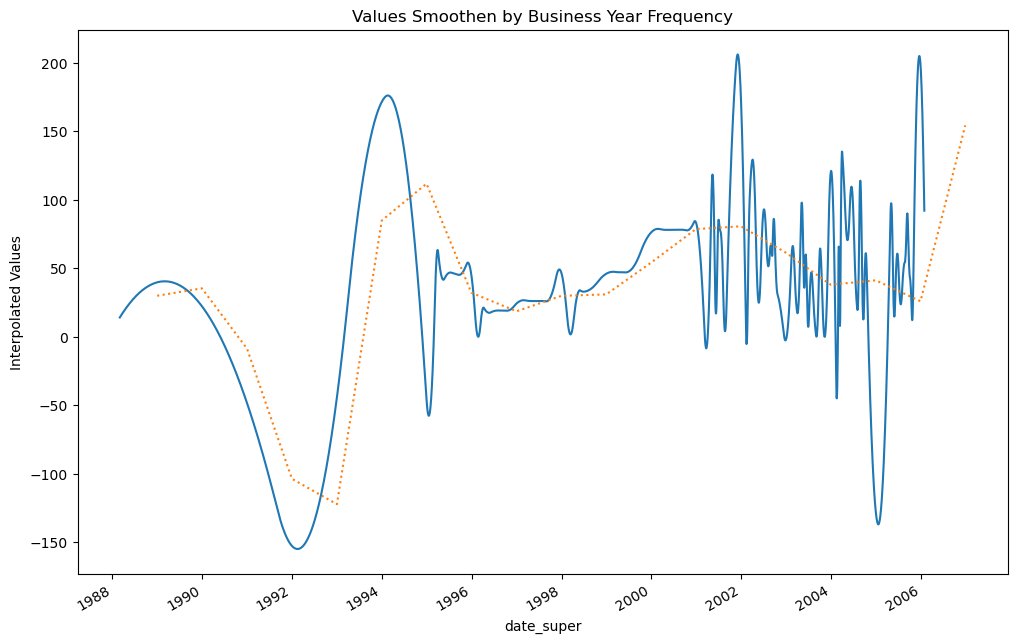

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.ylabel("Interpolated Values")
plt.plot(walmart_store_count_series)
walmart_store_count_series.resample('BA').mean().plot(style=':', title="Values Smoothen by Business Year Frequency") #BA stands for Business Year

<Axes: title={'center': 'Values Smoothen by Business Quarter Frequency'}, xlabel='date_super', ylabel='Interpolated Values'>

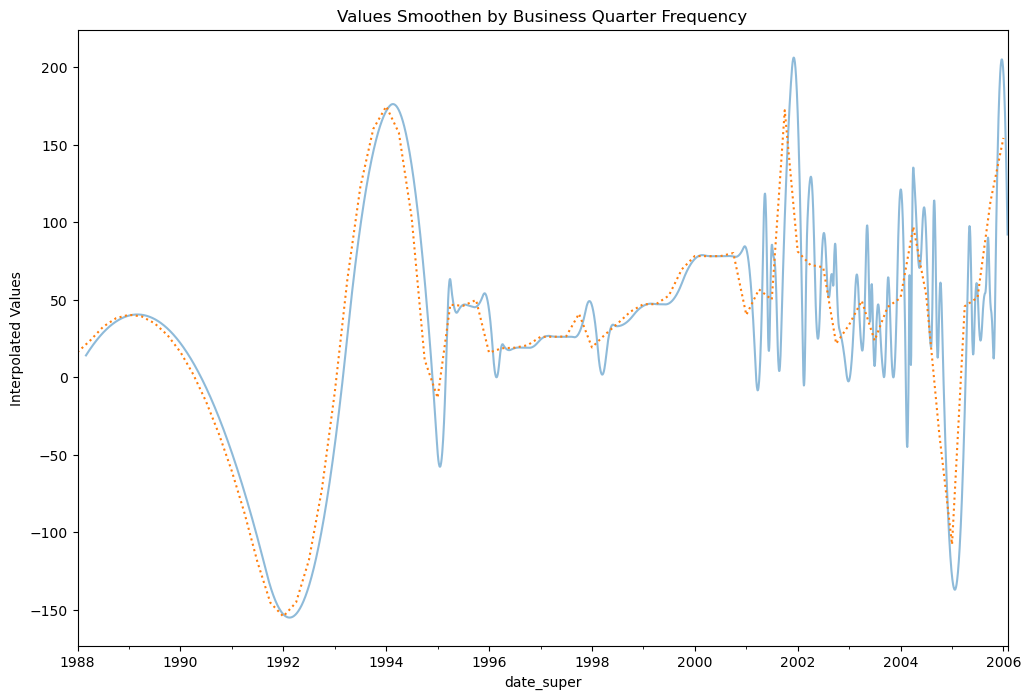

In [18]:
plt.figure(figsize=(12,8))
plt.ylabel("Interpolated Values")
walmart_store_count_series.plot(alpha=0.5, style='-')
walmart_store_count_series.resample('BQ').mean().plot(style=':',title="Values Smoothen by Business Quarter Frequency")#BQ stands for Business Quarter